In [1080]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [1081]:
data_file = "conso.txt"

In [1082]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [1083]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [1084]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


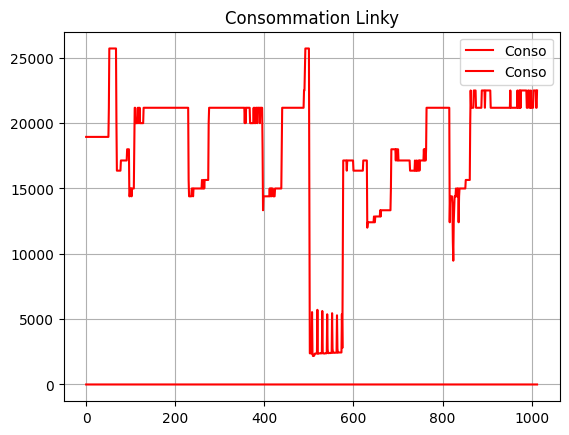

In [1085]:

plt.title('Consommation Linky')
plt.plot(data, color='red',label='Conso')

plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [1086]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [1087]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39058 entries, 0 to 39057
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Interval  39058 non-null  int64  
 1   kWh       39058 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 610.4 KB


In [1088]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
39053,24056,0.15
39054,24164,0.15
39055,23797,0.15
39056,24714,0.14


In [1089]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
39053,24056,0.15,24.056,149.650815,943477055
39054,24164,0.15,24.164,148.981957,943501219
39055,23797,0.15,23.797,151.279573,943525016
39056,24714,0.14,24.714,145.666424,943549730


In [1090]:
# index dernier echantillon
l=len(conso_data)-1
l

39057

In [1091]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

943574107000

In [1092]:
old

False

In [1093]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 0, 23, 46, 49063)

In [1094]:

if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)


conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39058 entries, 0 to 39057
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   39058 non-null  int64         
 1   kWh        39058 non-null  float64       
 2   sec        39058 non-null  float64       
 3   Wh         39058 non-null  float64       
 4   cumul(ms)  39058 non-null  int64         
 5   dates      39058 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 1.8 MB


In [1095]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:24:12.338063,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:24:38.581063,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:25:04.466063,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:25:30.220063,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:25:55.994063,07/03/2024
...,...,...,...,...,...,...,...
39053,24056,0.15,24.056,149.650815,943477055,2024-03-17 22:28:23.104063,17/03/2024
39054,24164,0.15,24.164,148.981957,943501219,2024-03-17 22:28:47.268063,17/03/2024
39055,23797,0.15,23.797,151.279573,943525016,2024-03-17 22:29:11.065063,17/03/2024
39056,24714,0.14,24.714,145.666424,943549730,2024-03-17 22:29:35.779063,17/03/2024


In [1096]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 00:24:12.338063   
 
          days  
 0  07/03/2024  ,
        Interval   kWh     sec         Wh  cumul(ms)  \
 39057     24377  0.15  24.377  147.68019  943574107   
 
                            dates        days  
 39057 2024-03-17 22:30:00.156063  17/03/2024  )

In [1097]:
# tranche journalière
now = datetime.now()
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day

'17/03/2024'

In [1098]:
#manuel
#day = '14/03/2024'


In [1099]:

conso_day = conso_data[conso_data['days']==day]
conso_jour = len(conso_day)
conso_jour

3137

In [1100]:
conso_day.head(1).dates, conso_day.tail(1).dates

(35921   2024-03-17 00:00:13.984063
 Name: dates, dtype: datetime64[ns],
 39057   2024-03-17 22:30:00.156063
 Name: dates, dtype: datetime64[ns])

In [1101]:
conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day

C:\Users\jean\AppData\Local\Temp\ipykernel_21524\1613890403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
35921,27346,0.13,27.346,131.646310,862587935,2024-03-17 00:00:13.984063,17/03/2024,0:0:13
35922,26851,0.13,26.851,134.073219,862614786,2024-03-17 00:00:40.835063,17/03/2024,0:0:40
35923,26342,0.14,26.342,136.663883,862641128,2024-03-17 00:01:07.177063,17/03/2024,0:1:7
35924,26646,0.14,26.646,135.104706,862667774,2024-03-17 00:01:33.823063,17/03/2024,0:1:33
35925,27456,0.13,27.456,131.118881,862695230,2024-03-17 00:02:01.279063,17/03/2024,0:2:1
...,...,...,...,...,...,...,...,...
39053,24056,0.15,24.056,149.650815,943477055,2024-03-17 22:28:23.104063,17/03/2024,22:28:23
39054,24164,0.15,24.164,148.981957,943501219,2024-03-17 22:28:47.268063,17/03/2024,22:28:47
39055,23797,0.15,23.797,151.279573,943525016,2024-03-17 22:29:11.065063,17/03/2024,22:29:11
39056,24714,0.14,24.714,145.666424,943549730,2024-03-17 22:29:35.779063,17/03/2024,22:29:35


In [1102]:
df= conso_day.set_index('heure')
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:13,27346,0.13,27.346,131.646310,862587935,2024-03-17 00:00:13.984063,17/03/2024
0:0:40,26851,0.13,26.851,134.073219,862614786,2024-03-17 00:00:40.835063,17/03/2024
0:1:7,26342,0.14,26.342,136.663883,862641128,2024-03-17 00:01:07.177063,17/03/2024
0:1:33,26646,0.14,26.646,135.104706,862667774,2024-03-17 00:01:33.823063,17/03/2024
0:2:1,27456,0.13,27.456,131.118881,862695230,2024-03-17 00:02:01.279063,17/03/2024
...,...,...,...,...,...,...,...
22:28:23,24056,0.15,24.056,149.650815,943477055,2024-03-17 22:28:23.104063,17/03/2024
22:28:47,24164,0.15,24.164,148.981957,943501219,2024-03-17 22:28:47.268063,17/03/2024
22:29:11,23797,0.15,23.797,151.279573,943525016,2024-03-17 22:29:11.065063,17/03/2024


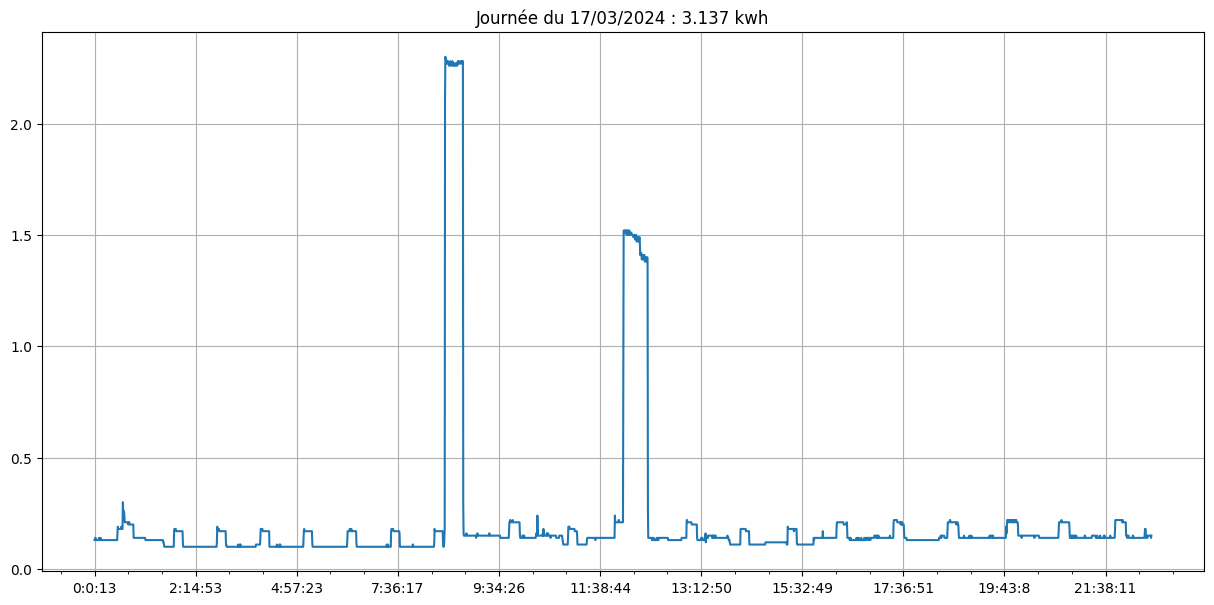

In [1103]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} : {conso_jour/1000} kwh')
plt.grid()

In [1104]:


time = conso_data['dates']
time


0       2024-03-07 00:24:12.338063
1       2024-03-07 00:24:38.581063
2       2024-03-07 00:25:04.466063
3       2024-03-07 00:25:30.220063
4       2024-03-07 00:25:55.994063
                   ...            
39053   2024-03-17 22:28:23.104063
39054   2024-03-17 22:28:47.268063
39055   2024-03-17 22:29:11.065063
39056   2024-03-17 22:29:35.779063
39057   2024-03-17 22:30:00.156063
Name: dates, Length: 39058, dtype: datetime64[ns]

In [1105]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [1106]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [1107]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

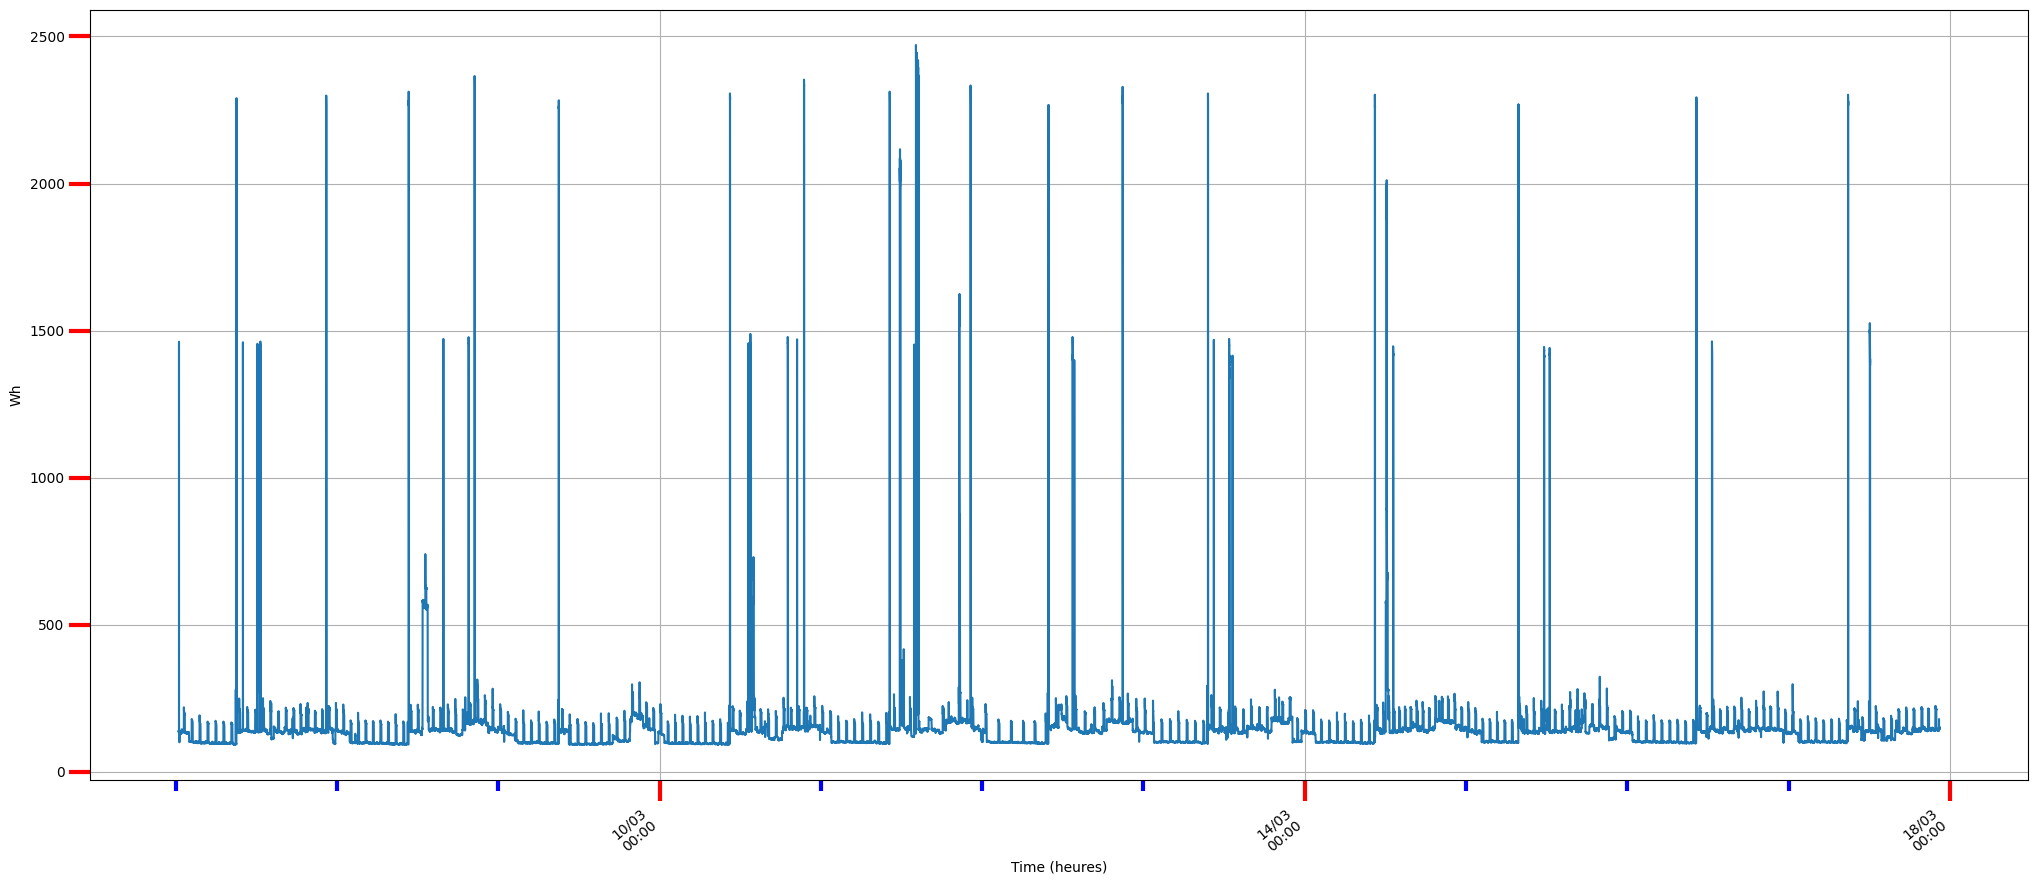

In [1108]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [1109]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
39057,24377,0.15,24.377,147.68019,943574107,2024-03-17 22:30:00.156063,17/03/2024


In [1110]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

943574107000

# Slice of last 1 kWh

In [1111]:
l = len(conso_data)  # total watt consommés
l

39058

In [1112]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(39058, 1000)

In [1113]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [1114]:
data = conso_data.tail(taille)
len(data),data

(1000,
        Interval   kWh     sec          Wh  cumul(ms)  \
 38058     25588  0.14  25.588  140.690949  919726150   
 38059     25211  0.14  25.211  142.794812  919751361   
 38060     25210  0.14  25.210  142.800476  919776571   
 38061     25319  0.14  25.319  142.185710  919801890   
 38062     25885  0.14  25.885  139.076685  919827775   
 ...         ...   ...     ...         ...        ...   
 39053     24056  0.15  24.056  149.650815  943477055   
 39054     24164  0.15  24.164  148.981957  943501219   
 39055     23797  0.15  23.797  151.279573  943525016   
 39056     24714  0.14  24.714  145.666424  943549730   
 39057     24377  0.15  24.377  147.680190  943574107   
 
                            dates        days  
 38058 2024-03-17 15:52:32.199063  17/03/2024  
 38059 2024-03-17 15:52:57.410063  17/03/2024  
 38060 2024-03-17 15:53:22.620063  17/03/2024  
 38061 2024-03-17 15:53:47.939063  17/03/2024  
 38062 2024-03-17 15:54:13.824063  17/03/2024  
 ...               

In [1115]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [1116]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [1117]:
cumtime_end,cumtime_start

(943574107000, 919751361000)

In [1118]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

23822746000

In [1119]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 3, 17, 22, 30, 5, 944903),
 datetime.datetime(2024, 3, 17, 15, 53, 3, 198903),
 '17/03/2024 22:30:00')

In [1120]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:24:12.338063,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:24:38.581063,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:25:04.466063,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:25:30.220063,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:25:55.994063,07/03/2024
...,...,...,...,...,...,...,...
39053,24056,0.15,24.056,149.650815,943477055,2024-03-17 22:28:23.104063,17/03/2024
39054,24164,0.15,24.164,148.981957,943501219,2024-03-17 22:28:47.268063,17/03/2024
39055,23797,0.15,23.797,151.279573,943525016,2024-03-17 22:29:11.065063,17/03/2024
39056,24714,0.14,24.714,145.666424,943549730,2024-03-17 22:29:35.779063,17/03/2024


In [1121]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('17/03/2024 15:52:57', '17/03/2024 22:30:00')

In [1122]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-03-17 15:52:32.199063', '2024-03-17 22:30:00.156063')

In [1123]:
k

1

In [1124]:
data.Interval.tail(1000)

38058    25588
38059    25211
38060    25210
38061    25319
38062    25885
         ...  
39053    24056
39054    24164
39055    23797
39056    24714
39057    24377
Name: Interval, Length: 1000, dtype: int64

In [1125]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(6.631540277777779, 3.6190687223032856, 6, 37, 53)

In [1126]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_21524\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [1127]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
38058,25588,0.14,25.588,140.690949,919726150,2024-03-17 15:52:32.199063,17/03/2024,2024-03-17 15:52:32.199063
38059,25211,0.14,25.211,142.794812,919751361,2024-03-17 15:52:57.410063,17/03/2024,2024-03-17 15:52:57.410063
38060,25210,0.14,25.210,142.800476,919776571,2024-03-17 15:53:22.620063,17/03/2024,2024-03-17 15:53:22.620063
38061,25319,0.14,25.319,142.185710,919801890,2024-03-17 15:53:47.939063,17/03/2024,2024-03-17 15:53:47.939063
38062,25885,0.14,25.885,139.076685,919827775,2024-03-17 15:54:13.824063,17/03/2024,2024-03-17 15:54:13.824063
...,...,...,...,...,...,...,...,...
39053,24056,0.15,24.056,149.650815,943477055,2024-03-17 22:28:23.104063,17/03/2024,2024-03-17 22:28:23.104063
39054,24164,0.15,24.164,148.981957,943501219,2024-03-17 22:28:47.268063,17/03/2024,2024-03-17 22:28:47.268063
39055,23797,0.15,23.797,151.279573,943525016,2024-03-17 22:29:11.065063,17/03/2024,2024-03-17 22:29:11.065063
39056,24714,0.14,24.714,145.666424,943549730,2024-03-17 22:29:35.779063,17/03/2024,2024-03-17 22:29:35.779063


<Axes: >

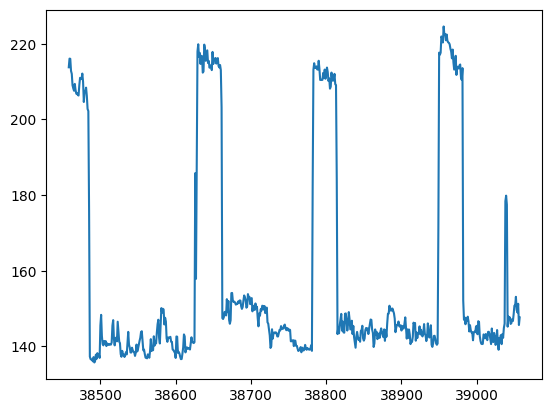

In [1128]:
data.tail(600)['Wh'].plot()

In [1129]:
data['Wh']

38058    140.690949
38059    142.794812
38060    142.800476
38061    142.185710
38062    139.076685
            ...    
39053    149.650815
39054    148.981957
39055    151.279573
39056    145.666424
39057    147.680190
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

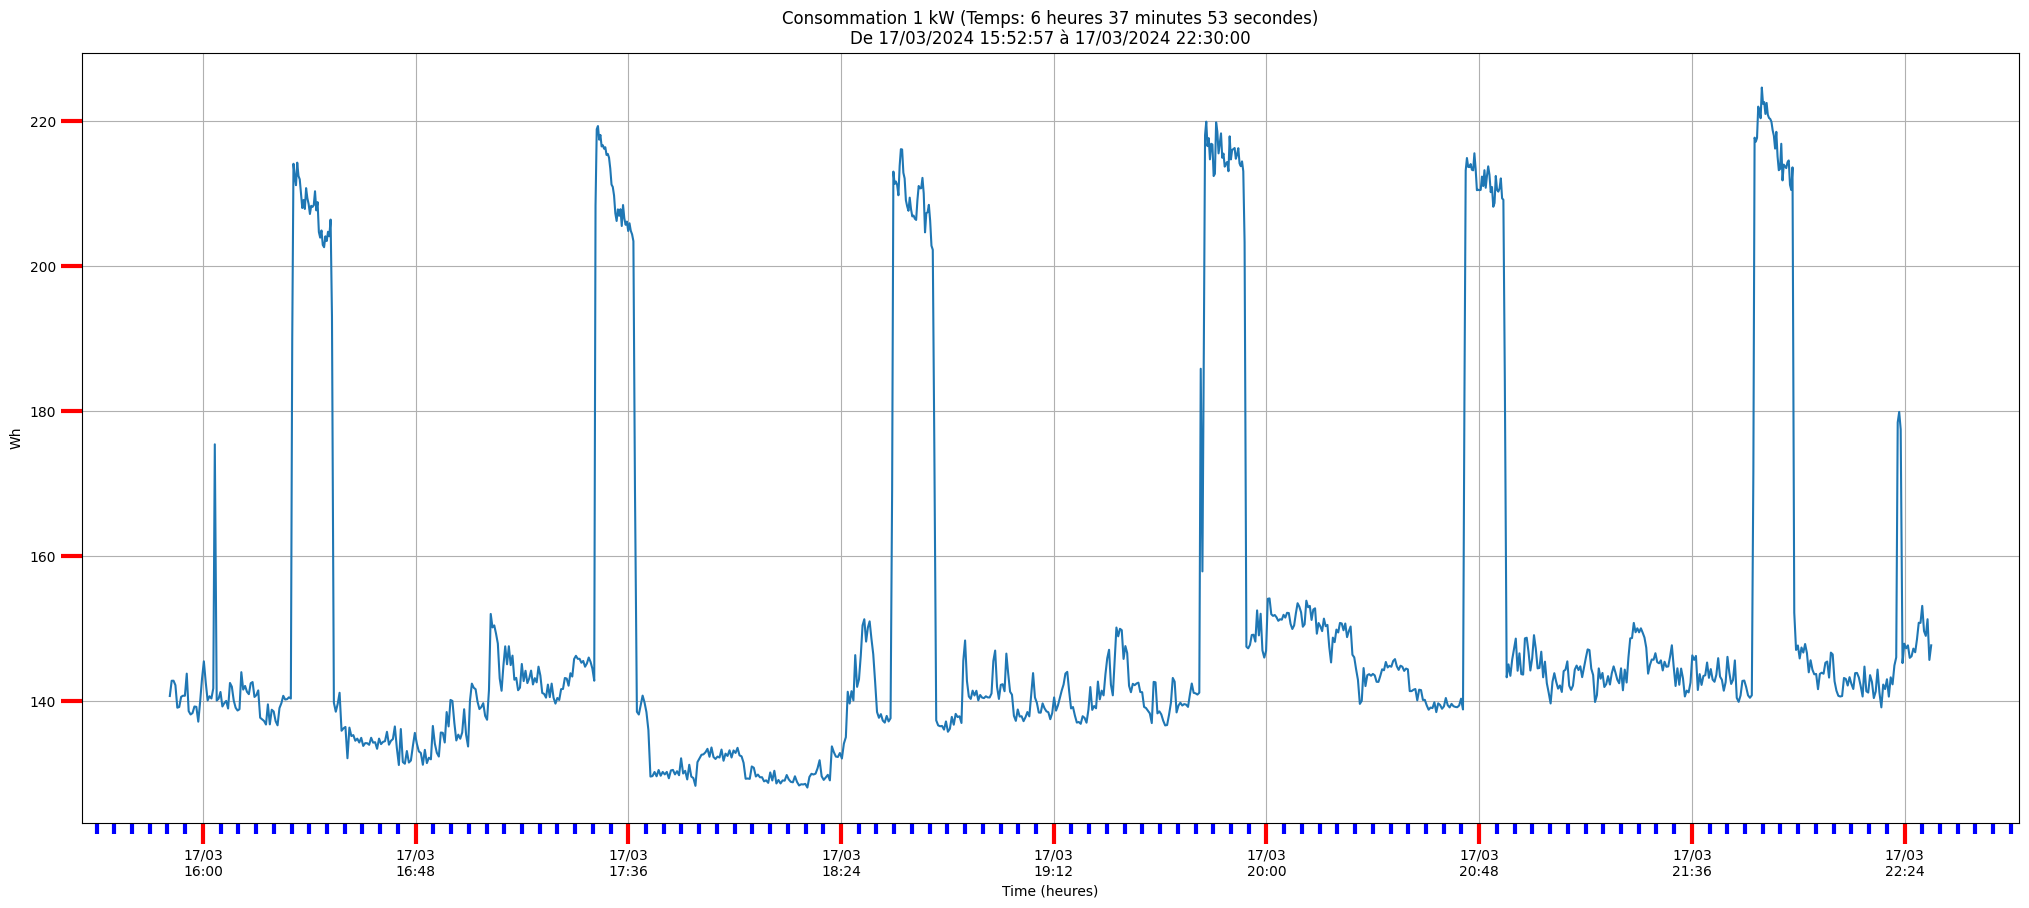

In [1130]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

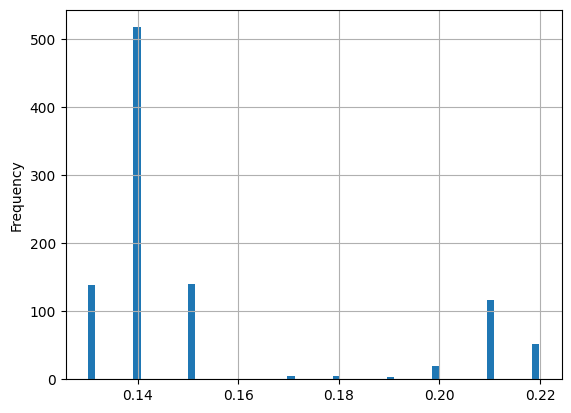

In [1131]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [1132]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
39053,24056,0.15,24.056,149.650815,943477055,2024-03-17 22:28:23.104063,17/03/2024
39054,24164,0.15,24.164,148.981957,943501219,2024-03-17 22:28:47.268063,17/03/2024
39055,23797,0.15,23.797,151.279573,943525016,2024-03-17 22:29:11.065063,17/03/2024
39056,24714,0.14,24.714,145.666424,943549730,2024-03-17 22:29:35.779063,17/03/2024
39057,24377,0.15,24.377,147.680190,943574107,2024-03-17 22:30:00.156063,17/03/2024


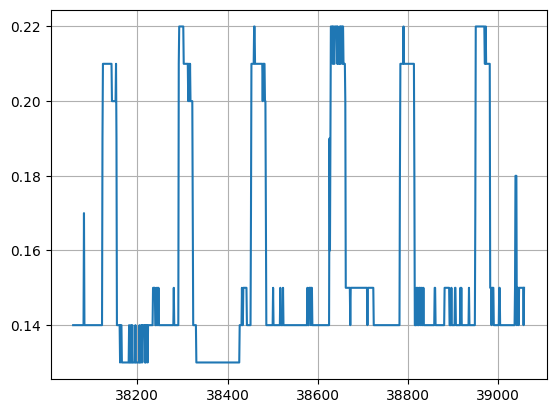

In [1133]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [1134]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(943574107000.0, 15726.235116666667)

In [1135]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 3, 17, 22, 30, 11, 191519),
 datetime.datetime(2024, 3, 7, 0, 23, 57, 84519))

In [1136]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(39058, 943575, 262.1041666666667)

In [1137]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [1138]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [1139]:
732/12 # 60 jours

61.0

In [1140]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

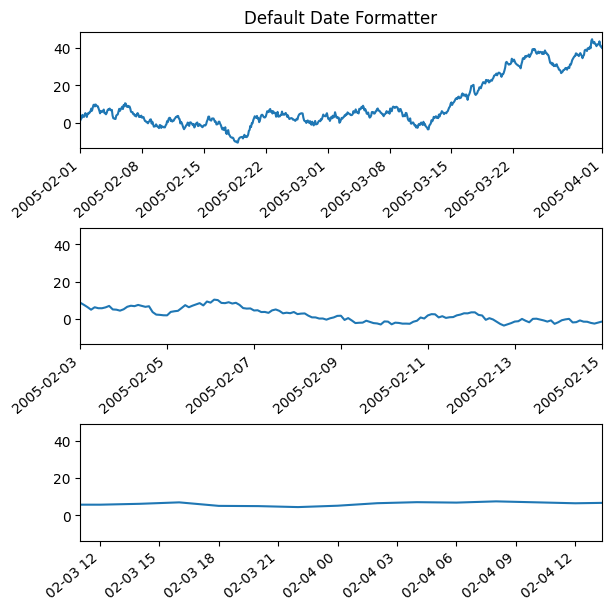

In [1141]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [1142]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)